In [5]:
# !pip install tensorflow matplotlib 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD, Adam, RMSprop 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [6]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

In [9]:
# Define a function to build the model 
def build_model():
    return Sequential([
        Dense(128, activation='relu', input_shape=(784,)), 
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
])

In [11]:
# Optimizers to test
optimizers = {'SGD': SGD(), 'Adam': Adam(), 'RMSprop': RMSprop()} 
results = {}

In [12]:
# Train and evaluate model for each optimizer 
for name, optimizer in optimizers.items():
    model = build_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0) 
    results[name] = history.history['val_accuracy']

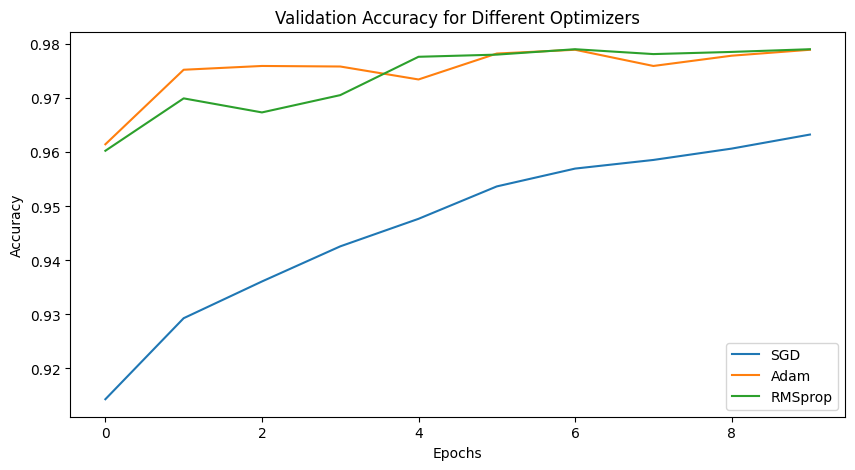

In [15]:
# Plot validation accuracy 
plt.figure(figsize=(10, 5))
for name, val_acc in results.items():
    plt.plot(val_acc, label=name)
plt.title('Validation Accuracy for Different Optimizers') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()


plt.show()